In [1]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from matplotlib import pyplot
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import numpy as np
X, y = make_regression(n_features=10, n_informative=5, random_state=10, shuffle=False, n_samples=1000)

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [3]:
RFR = RandomForestRegressor(n_estimators=100, max_depth=5, max_features=2)
RFR.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features=2)

In [4]:
y_pred = RFR.predict(X_test)
r2 = metrics.r2_score(y_test, y_pred)
print('R-squared score:', r2)

R-squared score: 0.6600074764084175


In [5]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=100)]
max_depth = [int(x) for x in np.linspace(10, 100, num = 20)] 
max_features = ['auto', 'sqrt', 'log2']
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'bootstrap': bootstrap
}
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=10, n_jobs = -1)
rf_random.fit(X_train, y_train)
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters:  {'n_estimators': 790, 'max_features': 'auto', 'max_depth': 81, 'bootstrap': True}  



In [6]:
RFR_2 = RandomForestRegressor(n_estimators=372, max_features='auto', max_depth=19, bootstrap=True)
RFR_2.fit(X_train, y_train)
y_pred = RFR_2.predict(X_test)
r2 = metrics.r2_score(y_test, y_pred)
print('R-squared score:', r2)

R-squared score: 0.9178773643094609


Feature: 0, Score: 0.07970
Feature: 1, Score: 0.05148
Feature: 2, Score: 0.44063
Feature: 3, Score: 0.00944
Feature: 4, Score: 0.38767
Feature: 5, Score: 0.00613
Feature: 6, Score: 0.00668
Feature: 7, Score: 0.00660
Feature: 8, Score: 0.00593
Feature: 9, Score: 0.00574


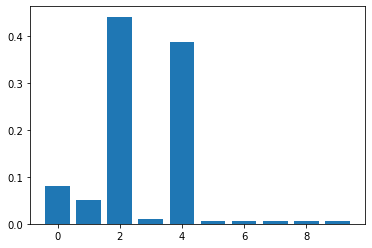

In [7]:
importance = RFR_2.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [8]:
bc = BaggingRegressor(base_estimator=RFR_2)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
r2 = metrics.r2_score(y_test, y_pred)
print('R-squared score:', r2)

R-squared score: 0.9073055087205397


Feature: 0, Score: 0.07499
Feature: 1, Score: 0.05035
Feature: 2, Score: 0.46957
Feature: 3, Score: 0.01144
Feature: 4, Score: 0.35737
Feature: 5, Score: 0.00715
Feature: 6, Score: 0.00730
Feature: 7, Score: 0.00728
Feature: 8, Score: 0.00714
Feature: 9, Score: 0.00742


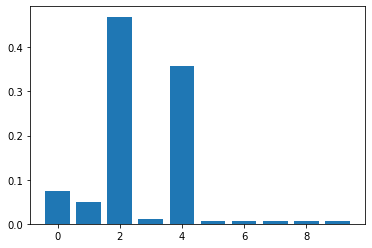

In [9]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in bc.estimators_
], axis=0)

# summarize feature importance
for i,v in enumerate(feature_importances):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(feature_importances))], feature_importances)
pyplot.show()